   EMG    Angle  CTS_Label
0    0  0.00000          3
1    0  0.09009          3
2    0  0.18018          3
3    0  0.27027          3
4    1  0.36036          3
Epoch 1/15


e:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5665 - loss: 1.0210 - val_accuracy: 0.7475 - val_loss: 0.6183
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 0.5530 - val_accuracy: 0.7980 - val_loss: 0.3565
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8542 - loss: 0.3610 - val_accuracy: 0.9293 - val_loss: 0.2325
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8887 - loss: 0.2796 - val_accuracy: 0.8889 - val_loss: 0.2023
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9284 - loss: 0.2206 - val_accuracy: 0.9495 - val_loss: 0.1424
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9310 - loss: 0.1929 - val_accuracy: 0.9293 - val_loss: 0.1763
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9245 - loss: 0.1933 - val_accuracy: 0.9899 - val_loss: 0.0865
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9169 - loss: 0.2028 - val_accuracy: 0.9899 - val_loss: 0.0708
Ep


Train Accuracy: 0.9798, Train Loss: 0.0661
Validation Accuracy: 1.0000, Validation Loss: 0.0402
Test Accuracy: 0.9798, Test Loss: 0.0565
RNN model saved as RNN_model.h5


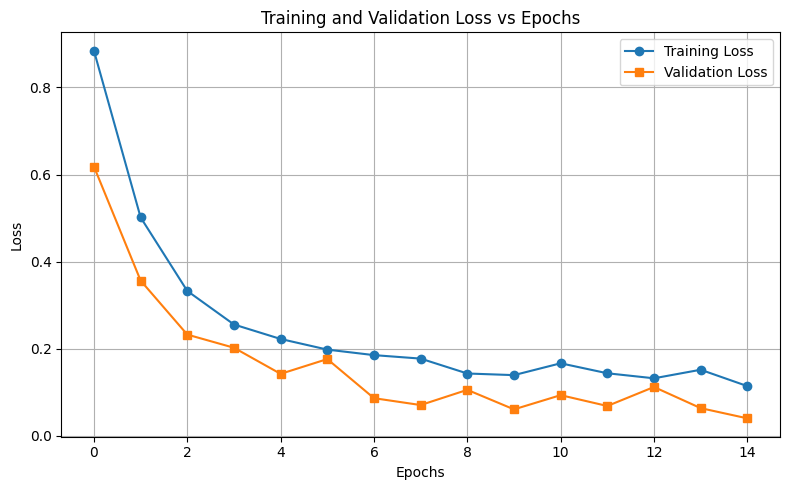

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


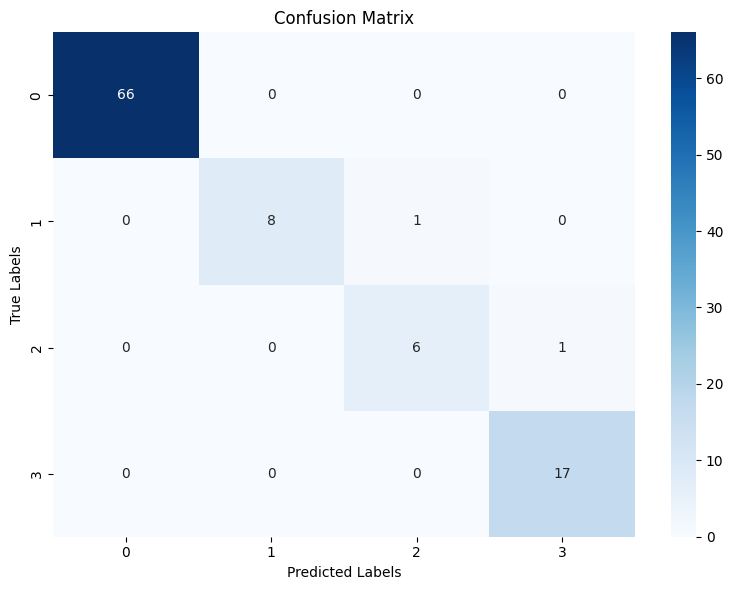

Accuracy: 0.9798
Precision: 0.9804
Recall: 0.9798
F1 Score: 0.9796

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      0.89      0.94         9
           2       0.86      0.86      0.86         7
           3       0.94      1.00      0.97        17

    accuracy                           0.98        99
   macro avg       0.95      0.94      0.94        99
weighted avg       0.98      0.98      0.98        99



In [ ]:
#SimpleRNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\shari\Downloads\interpolated_emg_dataset_with_labels.csv"
df = pd.read_csv(file_path)
print(df.head())

# Step 2: Normalize EMG values
scaler = MinMaxScaler()
df['EMG value'] = scaler.fit_transform(df[['EMG']])

# Step 3: Create time-series sequences
def create_sequences(data, labels, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
emg_values = df['EMG'].values
cts_labels = df['CTS_Label'].values

X, y = create_sequences(emg_values, cts_labels, sequence_length)

# Step 4: One-hot encode the labels
y_encoded = to_categorical(y, num_classes=4)

# Step 5: Train/test/validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 6: Define the RNN model
model = Sequential([
    SimpleRNN(64, input_shape=(sequence_length, 1), activation='tanh'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(4, activation='softmax')
    
        # 4 classes: No CTS, Mild, Moderate, Severe
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(
    X_train.reshape(-1, sequence_length, 1),
    y_train,
    validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

# Step 8: Evaluate on each dataset
train_loss, train_acc = model.evaluate(X_train.reshape(-1, sequence_length, 1), y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val.reshape(-1, sequence_length, 1), y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test.reshape(-1, sequence_length, 1), y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Step 9: Save the model
model.save("RNN_model.h5")
print("RNN model saved as RNN_model.h5")

# Step 10: Plot training and validation loss vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on the test set
y_pred = model.predict(X_test.reshape(-1, sequence_length, 1))
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Step 2: Compute metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Step 3: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Step 4: Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 5: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))



Testing activation functions...


e:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Testing optimizers...

Testing dropout rates...

Testing units...


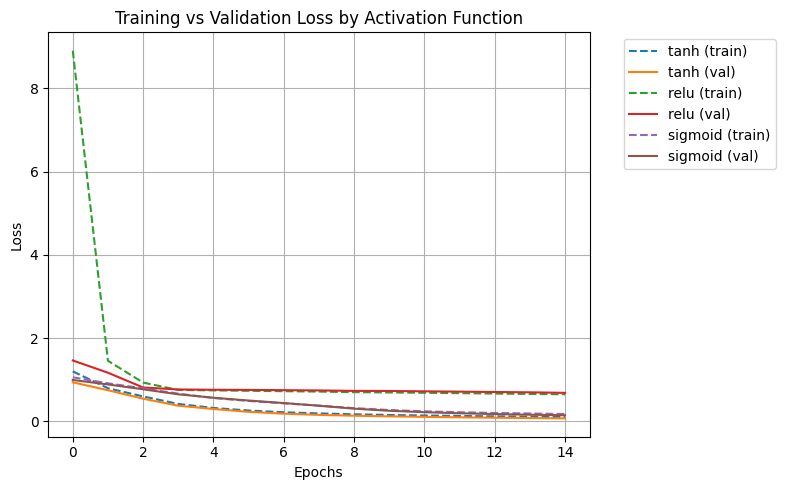

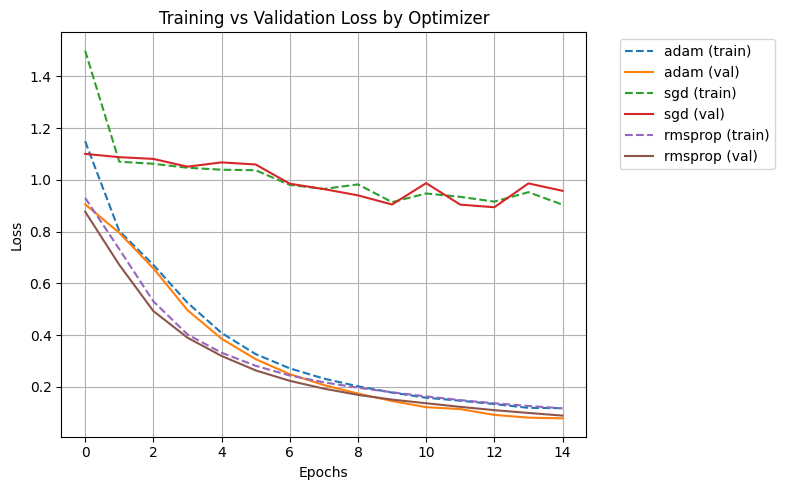

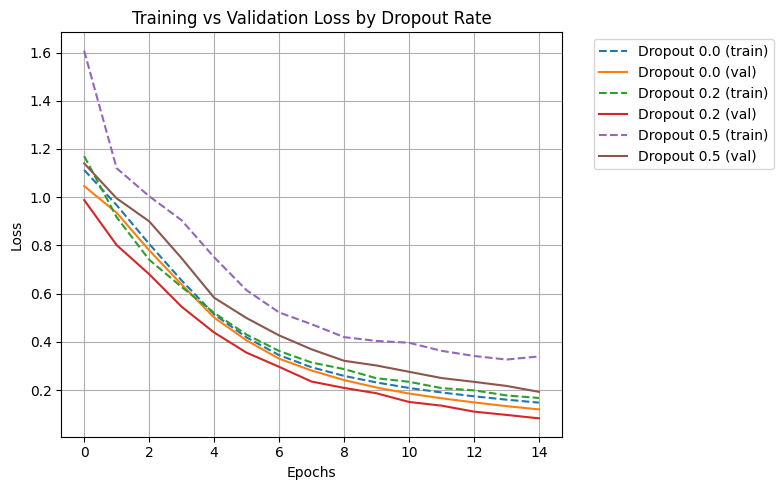

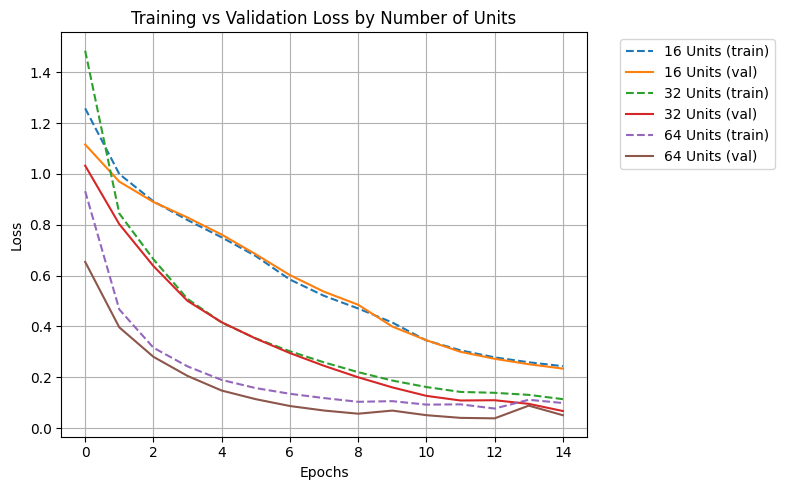


Train Accuracy: 0.9722, Train Loss: 0.0767
Validation Accuracy: 1.0000, Validation Loss: 0.0505
Test Accuracy: 0.9899, Test Loss: 0.0470


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\shari\Downloads\interpolated_emg_dataset_with_labels.csv"
df = pd.read_csv(file_path)

# Step 2: Normalize EMG values
scaler = MinMaxScaler()
df['EMG value'] = scaler.fit_transform(df[['EMG']])

# Step 3: Create time-series sequences
def create_sequences(data, labels, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
emg_values = df['EMG'].values
cts_labels = df['CTS_Label'].values

X, y = create_sequences(emg_values, cts_labels, sequence_length)

# Step 4: One-hot encode the labels
y_encoded = to_categorical(y, num_classes=4)

# Step 5: Train/test/validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Configuration experiments
activations = ['tanh', 'relu', 'sigmoid']
optimizers = ['adam', 'sgd', 'rmsprop']
dropout_rates = [0.0, 0.2, 0.5]
units_list = [16, 32, 64]

# Storage for results
activation_results = {}
optimizer_results = {}
dropout_results = {}
units_results = {}

# 1. Activation Function Comparison
print("Testing activation functions...")
for activation in activations:
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), activation=activation),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train.reshape(-1, sequence_length, 1),
        y_train,
        validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
        epochs=15,
        batch_size=32,
        verbose=0
    )
    
    activation_results[activation] = {
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# 2. Optimizer Comparison
print("\nTesting optimizers...")
for optimizer in optimizers:
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), activation='tanh'),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train.reshape(-1, sequence_length, 1),
        y_train,
        validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
        epochs=15,
        batch_size=32,
        verbose=0
    )
    
    optimizer_results[optimizer] = {
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# 3. Dropout Rate Comparison
print("\nTesting dropout rates...")
for rate in dropout_rates:
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), activation='tanh'),
        Dropout(rate),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train.reshape(-1, sequence_length, 1),
        y_train,
        validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
        epochs=15,
        batch_size=32,
        verbose=0
    )
    
    dropout_results[rate] = {
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# 4. Units Comparison
print("\nTesting units...")
for units in units_list:
    model = Sequential([
        SimpleRNN(units, input_shape=(sequence_length, 1), activation='tanh'),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train.reshape(-1, sequence_length, 1),
        y_train,
        validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
        epochs=15,
        batch_size=32,
        verbose=0
    )
    
    units_results[units] = {
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

# Plot 1: Activation Functions
plt.figure(figsize=(8, 5))
for activation in activations:
    plt.plot(activation_results[activation]['loss'], '--', label=f'{activation} (train)')
    plt.plot(activation_results[activation]['val_loss'], '-', label=f'{activation} (val)')
plt.title('Training vs Validation Loss by Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 2: Optimizers
plt.figure(figsize=(8, 5))
for optimizer in optimizers:
    plt.plot(optimizer_results[optimizer]['loss'], '--', label=f'{optimizer} (train)')
    plt.plot(optimizer_results[optimizer]['val_loss'], '-', label=f'{optimizer} (val)')
plt.title('Training vs Validation Loss by Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 3: Dropout Rates
plt.figure(figsize=(8, 5))
for rate in dropout_rates:
    plt.plot(dropout_results[rate]['loss'], '--', label=f'Dropout {rate} (train)')
    plt.plot(dropout_results[rate]['val_loss'], '-', label=f'Dropout {rate} (val)')
plt.title('Training vs Validation Loss by Dropout Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Plot 4: Number of Units
plt.figure(figsize=(8, 5))
for units in units_list:
    plt.plot(units_results[units]['loss'], '--', label=f'{units} Units (train)')
    plt.plot(units_results[units]['val_loss'], '-', label=f'{units} Units (val)')
plt.title('Training vs Validation Loss by Number of Units')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# Step 8: Evaluate on each dataset
train_loss, train_acc = model.evaluate(X_train.reshape(-1, sequence_length, 1), y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val.reshape(-1, sequence_length, 1), y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test.reshape(-1, sequence_length, 1), y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")




Epoch 1/15


e:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6679 - loss: 0.9963 - val_accuracy: 0.7475 - val_loss: 0.4446
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8273 - loss: 0.3702 - val_accuracy: 0.9798 - val_loss: 0.1206
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9394 - loss: 0.1718 - val_accuracy: 0.9394 - val_loss: 0.1715
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9210 - loss: 0.2255 - val_accuracy: 0.9596 - val_loss: 0.0936
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9587 - loss: 0.1205 - val_accuracy: 1.0000 - val_loss: 0.0428
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9658 - loss: 0.0982 - val_accuracy: 0.9798 - val_loss: 0.0677
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9533 - loss: 0.1069 - val_accuracy: 0.9697 - val_loss: 0.0788
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9496 - loss: 0.1020 - val_accuracy: 0.9798 - val_loss: 0.

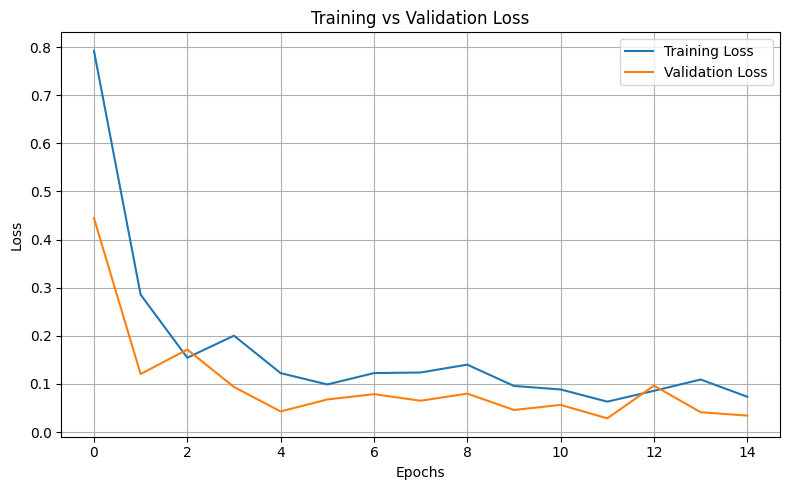

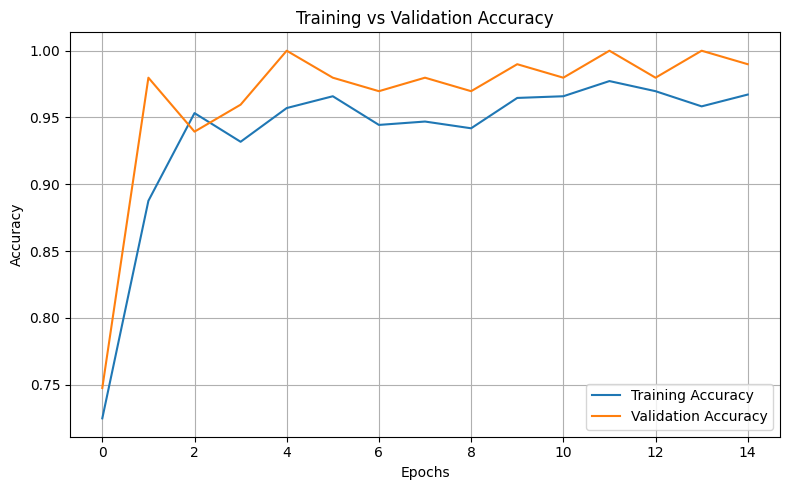

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


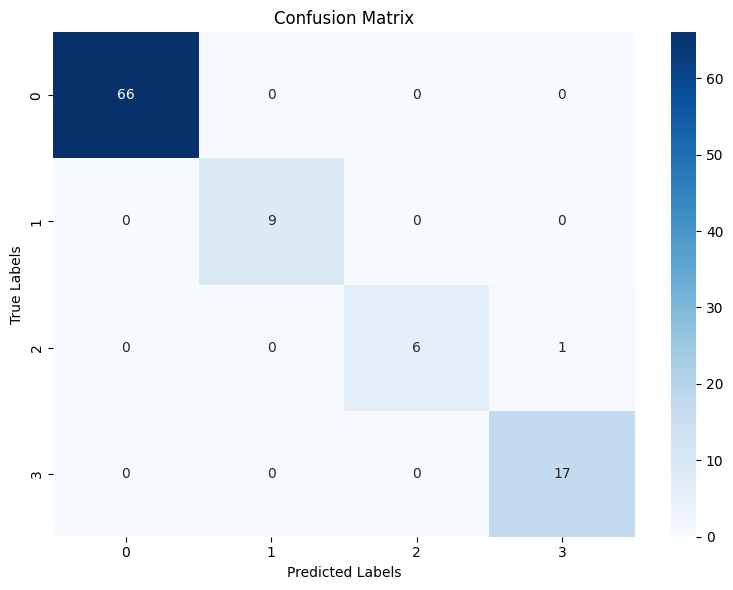

Accuracy: 0.9899
Precision: 0.9905
Recall: 0.9899
F1 Score: 0.9897

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00         9
           2       1.00      0.86      0.92         7
           3       0.94      1.00      0.97        17

    accuracy                           0.99        99
   macro avg       0.99      0.96      0.97        99
weighted avg       0.99      0.99      0.99        99



In [ ]:
#LSTM
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\shari\Downloads\interpolated_emg_dataset_with_labels.csv"
df = pd.read_csv(file_path)

# Step 2: Normalize EMG values
scaler = MinMaxScaler()
df['EMG value'] = scaler.fit_transform(df[['EMG']])

# Step 3: Create time-series sequences
def create_sequences(data, labels, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10
emg_values = df['EMG'].values
cts_labels = df['CTS_Label'].values

X, y = create_sequences(emg_values, cts_labels, sequence_length)

# Step 4: One-hot encode the labels
y_encoded = to_categorical(y, num_classes=4)

# Step 5: Train/test/validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 6: Build LSTM model with 3 hidden layers (64 neurons each)
model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1), activation='tanh', return_sequences=True),
    Dropout(0.1),
    LSTM(64, activation='tanh'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(
    X_train.reshape(-1, sequence_length, 1),
    y_train,
    validation_data=(X_val.reshape(-1, sequence_length, 1), y_val),
    epochs=15,
    batch_size=32,
    verbose=1
)

# Step 8: Evaluate the model on test data
train_loss, train_acc = model.evaluate(X_train.reshape(-1, sequence_length, 1), y_train)
val_loss, val_acc = model.evaluate(X_val.reshape(-1, sequence_length, 1), y_val)
test_loss, test_acc = model.evaluate(X_test.reshape(-1, sequence_length, 1), y_test)

print(f"\nTrain Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Step 9: Plot training and validation loss/accuracy curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on the test set
y_pred = model.predict(X_test.reshape(-1, sequence_length, 1))
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Step 2: Compute metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Step 3: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Step 4: Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 5: Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
